# Week5 : Tree Based Methods

### Objectives
This homework sheet will help reviewing the basic concepts associated with tree-based methods and provide a basic introduction to the ML workflow using real-world datasets. Please review the lectures, suggested readings, and additional resources _before_ getting started on the HW.

**Some questions in this assignment will require you to conduct independent research beyond the material covered in the recorded content.**

The following website has access to the relevant datasets from the recommended textbook: https://book.huihoo.com/introduction-to-statistical-learning/data.html

Marks Distribution

| Question      | Marks |
| ----------- | ----------- |
| 1     | 3      |
| 2     | 3     |
| 3a     | 2     |
| 3b     | 2     |
| 3c     | 5     |

# Questions

Conceptual


Q1. Draw an example (of your own invention) of a partition of two-dimensional feature space that could result from recursive binary splitting. Your example should contain at least six regions. Draw a decision tree corresponding to this partition. Be sure to label all aspects of your figures, including the regions $R_1$, $R_2$, ... , the cutpoints $t_1$ , $t_2$, ..., and so forth. Please insert your sketch below.


**Please note: You can use Microsoft word / any editor or draw the image by hand, you can upload the image / screenshot  to colab file using insert image option in text cell**


I created an example that illustrates recursive binary splitting 
- Consider a situation where a number of identical people were given different volumes of protein (X1), and exercise (X2), and their growth of muscle was measured in some time-frame following.
- This growth is captured by the categorical target variable Y, which takes the value 'Yes' if the muscle grew > 1cm, else 'No'.



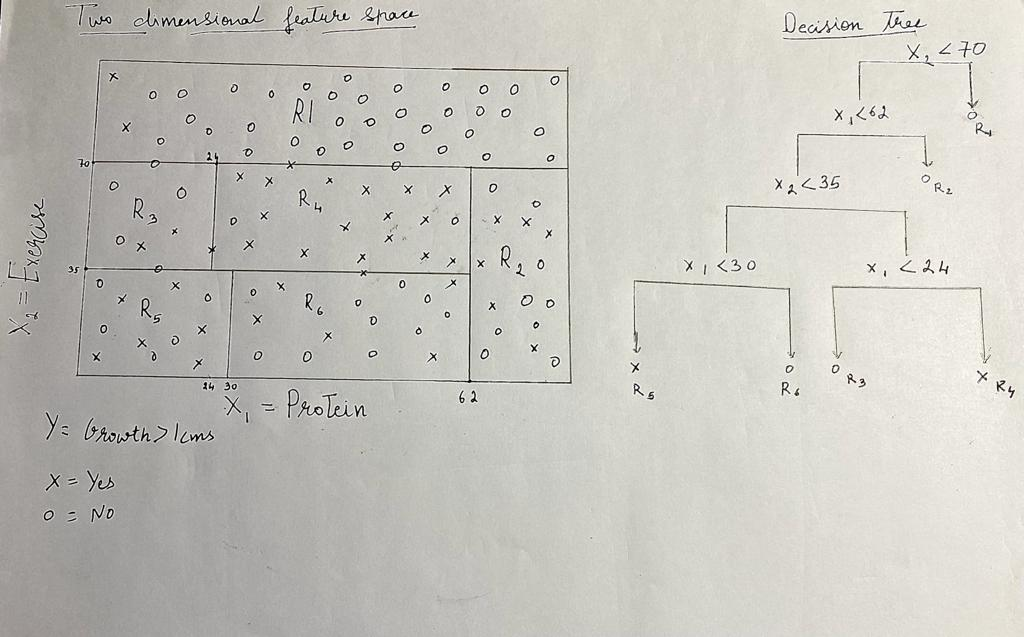

The high levels of Protein are regardless and therefore limit growth, but generally a balance between Protein and exercise is most productive for muscle growth. That is to say that the degree to which Protein (X1) impacts growth (Y) depends on the level of exercise (X2).

Q2. Suppose we produce ten bootstrapped samples from a data set containing red and green classes. We then apply a classification tree to each bootstrapped sample and, for a specific value of $X$, produce $10$ estimates of $P(Class is Red|X)$:

$0.1$, $0.15$, $0.2$, $0.2$, $0.55$, $0.6$, $0.6$, $0.65$, $0.7$, and $0.75$.

There are two common ways to combine these results together into a single class prediction. One is the majority vote approach , the second approach is to classify based on the average probability. In this example, what is the final classification under each of these two approaches?

- For the majority vote approach, would classify based on the most common class among the 10 estimates P >= 0.5
- The most common class is "Class Red" since there are more estimates for this class. Therefore, the final classification under the majority vote approach would be "Class Red."
- For the average probability approach, would take the average of the 10 estimates
- That is 4.5/10 = 0.45
- The final classification under the average probability approach would be based on whether this average probability is greater than or equal to 0.5. In this case, 0.45 < 0.5, so the final classification would be "Class Green."

# APPLIED

Q3. Apply boosting and random forest to a data set of your choice. Feel free to use any of the datasets from ISLR dataset link provided ( https://book.huihoo.com/introduction-to-statistical-learning/data.html ) to examine any of the questions that were discussed in any of the previous homeworks. Be sure to fit the models on a training set and to evaluate their performance on a test set. How accurate are the results compared to simple methods (e.g. linear or logistic regression models)? Which of these approaches yields the best performance?

**a) Read the dataset using function read_csv( ) from pandas library and preprocess the data if required ( check for any missing values etc )**



#### ANSWER



In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

In [2]:
Autodata = pd.read_csv('/Users/virensasalu/Documents/coding/UOA Coding Files/Course 3/Auto_Week4.csv') 
Autodata.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
#pre-processing the data
ProcessedAutoData = Autodata.copy()
#print(ProcessedAutoData.isnull().sum())
#upon close exmaination of the dataset, only few data points are missing. So I decided to drop them.
#PreProcessedData.info()
ProcessedAutoData.replace('?', np.nan, inplace=True)
ProcessedAutoData = ProcessedAutoData.dropna()
if 'name' in ProcessedAutoData.columns:
    ProcessedAutoData = ProcessedAutoData.drop('name', axis=1)

non_numeric_columns = ProcessedAutoData.select_dtypes(exclude=[np.number]).columns
#print("Non-numeric columns:", non_numeric_columns)
ProcessedAutoData['horsepower'] = ProcessedAutoData['horsepower'].astype(int)
print(ProcessedAutoData.isnull().sum())
print()
ProcessedAutoData.head()
ProcessedAutoData.info()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 396
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 27.6 KB


**Develop a model to predict whether a given car gets high or low gas mileage based on the Auto data set.**

In [4]:
#I am choosing week 4 question
median = ProcessedAutoData['mpg'].median()
ProcessedAutoData['mpg01'] = (ProcessedAutoData['mpg'] > median).astype(int)
ProcessedAutoData = ProcessedAutoData.drop('mpg', axis=1)
ProcessedAutoData.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,0
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,0
4,8,302.0,140,3449,10.5,70,1,0


**b) Split the data into train data  and test data ( proportion of train and test data of your choice ) Reference :https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html**

##### Selecting only features like cylinders, displacement, horsepower, weight which are likely to be useful in predicting mpg01

In [5]:
X = ProcessedAutoData.drop(['mpg01', 'acceleration', 'year', 'origin'], axis=1)
y = ProcessedAutoData['mpg01']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

**c) Train the data on the below models 
i) Linear regression model ii) Gradient boosting model iii) Random forest model
check the train and test r2 score and mention your findings on which model performed better in terms of underfitting / overfitting etc**

In [14]:
#GradientBoost
GradientBoost = GradientBoostingClassifier(n_estimators=50, random_state=42)
GradientBoost.fit(X_train, y_train)
GradientBoostPredictionsTest = GradientBoost.predict(X_test)
GradientBoostPredictionsTrain = GradientBoost.predict(X_train)

In [16]:
print('GradientBoost (Train) => R-squared:', r2_score(y_train, GradientBoostPredictionsTrain))
print("GradientBoost (Train) => Mean Squared Error:", mean_squared_error(y_train, GradientBoostPredictionsTrain))
print()
print('GradientBoost (Test) => R-squared:', r2_score(y_test, GradientBoostPredictionsTest))
print("GradientBoost (Test) => Mean Squared Error:", mean_squared_error(y_test, GradientBoostPredictionsTest))
print()
print('GradientBoost accuracy is:', accuracy_score(y_test, GradientBoostPredictionsTest))

GradientBoost (Train) => R-squared: 0.8720987250735535
GradientBoost (Train) => Mean Squared Error: 0.03194888178913738

GradientBoost (Test) => R-squared: 0.8461038961038961
GradientBoost (Test) => Mean Squared Error: 0.0379746835443038

GradientBoost accuracy is: 0.9620253164556962


In [8]:
#Random Forest
RandomForest = RandomForestClassifier(n_estimators=50, random_state=42)
RandomForest.fit(X_train, y_train)
randomForestPredTest = RandomForest.predict(X_test)
randomForestPredTrain = RandomForest.predict(X_train)

In [17]:
print('RandomForest (Train) => R-squared:', r2_score(y_train, randomForestPredTrain))
print("RandomForest (Train) => Mean Squared Error:", mean_squared_error(y_train, randomForestPredTrain))
print()
print('RandomForest (Test) => R-squared:', r2_score(y_test, randomForestPredTest))
print("RandomForest (Test) => Mean Squared Error:", mean_squared_error(y_test, randomForestPredTest))
print()
print('RandomForest accuracy is:', accuracy_score(y_test, randomForestPredTest))

RandomForest (Train) => R-squared: 1.0
RandomForest (Train) => Mean Squared Error: 0.0

RandomForest (Test) => R-squared: 0.6922077922077923
RandomForest (Test) => Mean Squared Error: 0.0759493670886076

RandomForest accuracy is: 0.9240506329113924


In [10]:
#LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)
LRpredTest = LR.predict(X_test)
LRpredTrain = LR.predict(X_train)

In [20]:
print('LinearRegression (Train) => R-squared:', r2_score(y_train, LRpredTrain))
print("LinearRegression (Train) => Mean Squared Error:", mean_squared_error(y_train, LRpredTrain))
print()
print('LinearRegression (Test) => R-squared:', r2_score(y_test, LRpredTest))
print("LinearRegression (Test) => Mean Squared Error:", mean_squared_error(y_test, LRpredTest))

LinearRegression (Train) => R-squared: 0.5938883112187037
LinearRegression (Train) => Mean Squared Error: 0.10144397970639574

LinearRegression (Test) => R-squared: 0.6477463357304059
LinearRegression (Test) => Mean Squared Error: 0.08692046835045264


- Gradient Boosting appears to be the most balanced model, providing good generalization to the test set without overfitting or underfitting.
- Random Forest exhibits signs of overfitting on the training set, as evidenced by the perfect R-squared, and its performance on the test set is not as strong as Gradient Boosting.
- Linear Regression performs decently but may not capture the underlying patterns as well as the ensemble methods. It shows some overfitting as the test set performance is slightly worse than the training set.